AR : 자기상관모형

MA : 이동평균 모형

ARMA : AR+MA 모형

ARIMA : ARMA + 과거 데이터의 추세까지 반영

# 아이디어

- 비트코인은 24시간 거래인데, 분단위의 시가, 종가, 고가, 저가가 중요한가?? ==>> 그냥 average로 묶어도 될 것 같음
- 가격은 아무래도 추세성을 탈 것 같음
- 가설1. 거래량 상승 => 가격 변동 => 거래 건수 변동
- 가설2. TAKER들이 유동성을 모두 소모하면 그 때 가격 변동이 시작

출처: https://doitddo.tistory.com/39 [두잇뚜]

In [1]:
# pandas 모듈을 임포트하여 pd로 사용한다. 
import pandas as pd 

# csv 파일로부터 데이터를 읽어들여 데이터프레임을 만든다. 구분자는 '\t' 를 사용한다. 
df = pd.read_csv('./open/train_y_df.csv')#, sep='\t') 

# 데이터 프레임의 첫 5개의 행을 출력하여 불러온 데이터가 어떤 형태인지 확인한다. 
print(df.head()) 

# df라는 변수가 어떤 데이터 타입인지 확인한다. DataFrame 으로 출력된다. 
print(type(df)) 

# 데이터 프레임의 행과 열의 크기를 반환한다. 반환값은 (행, 열)을 의미한다. 
print(df.shape) 

# 데이터 프레임의 각 열의 이름을 확인할 수 있다. 
print(df.columns) 

# 데이터 프레임의 각 열의 데이터 타입을 확인할 수 있다. 
print(df.dtypes) 

# 데이터 프레임의 각 열의 데이터 타입 등 데이터 프레임에 대한 내용을 확인할 수 있다. 
print(df.info())



   sample_id  time  coin_index      open      high       low     close  \
0          0     0           9  0.999389  0.999630  0.999261  0.999385   
1          0     1           9  0.999593  1.000000  0.999265  0.999266   
2          0     2           9  0.999266  0.999618  0.999262  0.999322   
3          0     3           9  0.999322  0.999388  0.998917  0.999387   
4          0     4           9  0.999015  0.999015  0.997631  0.998399   

     volume   quote_av    trades  tb_base_av  tb_quote_av  
0  0.001187   9.632785  0.012565    0.000605     4.904978  
1  0.004197  34.052364  0.020572    0.003014    24.453999  
2  0.003942  31.981472  0.016630    0.002967    24.069899  
3  0.003663  29.709074  0.019463    0.002362    19.158766  
4  0.003266  26.466251  0.030180    0.001533    12.421005  
<class 'pandas.core.frame.DataFrame'>
(919320, 12)
Index(['sample_id', 'time', 'coin_index', 'open', 'high', 'low', 'close',
       'volume', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av'],
 

In [2]:
# 데이터프레임의 'country' 열의 데이터만 추출하여 저장한다. 
open_df = df['open'] 

# 추출한 데이터의 타입을 확인한다. Series로 출력될 것. 
print(type(open_df)) 

# Series도 head, tail 메서드를 가지고 있으므로 데이터를 확인할 수 있다. 
print(open_df.head()) 
print(open_df.tail()) 

# 여러 열들을 추출할 수 있다. 이 때는 열의 리스트를 사용한다. 
subset = df[['open', 'volume', 'quote_av']] 

# 여러 열들을 추출한 결과는 데이터 프레임을 얻을 수 있다. 
print(type(subset)) 
print(subset.head()) 
print(subset.tail()) 

# loc -> 인덱스를 기준으로 행 데이터 추출 
# 0번째 인덱스의 데이터를 얻는다. 
print(df.loc[0]) 

# -1과 같은 잘못된 인덱스를 넘기는 경우 파이썬에서 에러가 발생한다. 
#print(df.loc[-1]) 

# 마지막 행의 데이터를 얻기 위한 방법 
# 총 행 수를 구하면 마지막 행의 인덱스는 그 값의 -1과 같다. 
number_of_rows = df.shape[0] 
last_row_index = number_of_rows - 1 
print(df.loc[last_row_index]) 

# 다른 방법으로, tail 함수를 사용할 수 있다. 
print(df.tail(n=1)) 

# 여러개의 특정인덱스의 데이터를 한 번에 얻는 방법 
print(df.loc[[0, 99, 999]]) 

# iloc -> 행 번호를 기준으로 행 데이터 추출 
# 1번 행, 99번 행 데이터 구하기 
print(df.iloc[1]) 
print(df.iloc[99]) 

# iloc는 -1을 전달할 경우 마지막 행 데이터를 반환한다. 
# 하지만 아예 존재하지 않는 행을 전달하면 오류가 발생한다. 
print(df.iloc[-1]) 

#print(df.iloc[1234567]) 
# 여러개의 특정 행의 데이터를 한 번에 얻는 방법 
print(df.iloc[[0, 99, 999]]) 

# loc, iloc에서 행과 열을 지정하는 방법 
# 모든 행의 'year', 'pop' 열 데이터를 얻는다. 
subset = df.loc[:, ['year', 'pop']] 
print(subset.head()) 

# 모든 행의 2번째 4번째 열과 마지막 열(-1) 데이터를 얻는다. 
subset = df.iloc[:, [2, 4, -1]] 
print(subset.head()) 

# range 메서드 사용해보기 

# 0, 1, 2, 3, 4 의 숫자 리스트 만들기 
small_range = list(range(5)) 
# 결과 확인 
print(small_range) 
print(type(small_range)) 

# 위에서 만든 리스트를 활용하여 열 지정 후 데이터 얻기 
subset = df.iloc[:, small_range] 
print(subset.head()) 

# 3, 4, 5 의 숫자 리스트 만들기 
small_range = list(range(3, 6)) 

# 결과 확인 
print(small_range) 

# 위에서 만든 리스트를 활용하여 열 지정 후 데이터 얻기 
subset = df.iloc[:, small_range] 
print(subset.head()) 

# 0 부터 2씩 증가하여 0, 2, 4 의 숫자 리스트 만들기 
small_range = list(range(0, 6, 2)) 

# 위에서 만든 리스트를 활용하여 열 지정 후 데이터 얻기 
subset = df.iloc[:, small_range] 
print(subset.head())

<class 'pandas.core.series.Series'>
0    0.999389
1    0.999593
2    0.999266
3    0.999322
4    0.999015
Name: open, dtype: float64
919315    1.002662
919316    1.002551
919317    1.001830
919318    1.001608
919319    1.001331
Name: open, dtype: float64
<class 'pandas.core.frame.DataFrame'>
       open    volume   quote_av
0  0.999389  0.001187   9.632785
1  0.999593  0.004197  34.052364
2  0.999266  0.003942  31.981472
3  0.999322  0.003663  29.709074
4  0.999015  0.003266  26.466251
            open    volume    quote_av
919315  1.002662  0.957148  173.131668
919316  1.002551  1.537946  277.939087
919317  1.001830  1.203197  217.364487
919318  1.001608  1.252859  226.264069
919319  1.001331  1.297642  234.339737
sample_id      0.000000
time           0.000000
coin_index     9.000000
open           0.999389
high           0.999630
low            0.999261
close          0.999385
volume         0.001187
quote_av       9.632785
trades         0.012565
tb_base_av     0.000605
tb_quote_av

KeyError: "None of [Index(['year', 'pop'], dtype='object')] are in the [columns]"

In [3]:
# lifeExp 열을 연도별로 그룹화하여 평균 계산하기 
print(df.groupby('quote_av')['close'].mean()) 

# 위 코드가 복잡하니 아래로 분리 해 보자. 

# 1. year를 기준으로 그룹화 한 데이터 프레임을 얻는다. 
grouped_quote_av_df = df.groupby('quote_av') 

# 2. 위에서 그룹화한 데이터의 lifeExp열을 추출한다. 
grouped_quote_av_df_close = grouped_quote_av_df['close'] 

# 3. mean 함수를 사용하여 평균값을 얻는다. 
mean_close_by_quote_av = grouped_quote_av_df_close.mean() # 

# 4. 얻은 평균값을 출력한다. 
print(mean_close_by_quote_av) 

# 다중 열 그룹화하여 평균내기 
multi_group_var = df.groupby(['quote_av', 'tb_quote_av'])[['close', 'close']].mean() 
print(multi_group_var) 

# # 그룹화한 데이터 개수 세기 
# print(df.groupby('tb_quote_av')['close'].nunique())

quote_av
0.000000e+00    0.999759
9.847106e-06    0.984711
9.898456e-06    0.989846
9.916975e-06    0.991697
9.922263e-06    0.992226
                  ...   
2.008227e+07    1.156183
2.138991e+07    1.117957
2.307404e+07    1.138709
2.603661e+07    1.161576
2.800062e+07    1.096385
Name: close, Length: 870962, dtype: float64
quote_av
0.000000e+00    0.999759
9.847106e-06    0.984711
9.898456e-06    0.989846
9.916975e-06    0.991697
9.922263e-06    0.992226
                  ...   
2.008227e+07    1.156183
2.138991e+07    1.117957
2.307404e+07    1.138709
2.603661e+07    1.161576
2.800062e+07    1.096385
Name: close, Length: 870962, dtype: float64
                              close     close
quote_av     tb_quote_av                     
0.000000e+00 0.000000e+00  0.999759  0.999759
9.847106e-06 9.847106e-06  0.984711  0.984711
9.898456e-06 9.898456e-06  0.989846  0.989846
9.916975e-06 0.000000e+00  0.991697  0.991697
9.922263e-06 0.000000e+00  0.992226  0.992226
...                   

In [4]:
# 다중 열 그룹화하여 평균내기 
multi_group_var = df.groupby(['coin_index', 'tb_quote_av'])[['close']].mean() 
print(multi_group_var) 

                           close
coin_index tb_quote_av          
0          0.000000     0.999849
           0.009977     0.996718
           0.010006     1.000552
           0.019904     0.995181
           0.020002     1.000122
...                          ...
9          883.385681   1.015727
           1192.253784  1.014086
           1305.920166  1.020591
           1312.161255  1.029587
           1484.601562  0.973293

[838812 rows x 1 columns]


quote_av
0.000000e+00    0.999759
9.847106e-06    0.984711
9.898456e-06    0.989846
9.916975e-06    0.991697
9.922263e-06    0.992226
                  ...   
2.008227e+07    1.156183
2.138991e+07    1.117957
2.307404e+07    1.138709
2.603661e+07    1.161576
2.800062e+07    1.096385
Name: close, Length: 870962, dtype: float64


<AxesSubplot:xlabel='quote_av'>

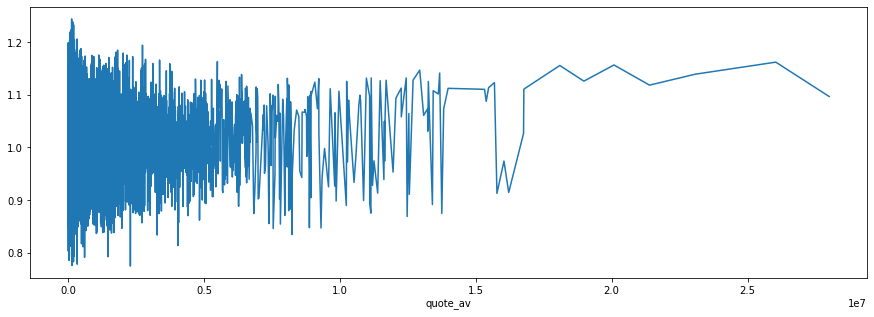

In [5]:
# 그래프 그리기를 위한 matplotlib 임포트 
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))
# 그래프를 그리기 위하여 데이터 획득 
global_yearly_life_expectancy = df.groupby('quote_av')['close'].mean() 
print(global_yearly_life_expectancy) 

# plot 메서드로 그래프 그리기 
global_yearly_life_expectancy.plot()

volume
0.000000e+00    0.999759
1.847328e-09    0.991305
4.439262e-09    1.001171
5.206291e-09    0.992840
6.235012e-09    1.000000
                  ...   
1.147236e+09    0.995798
1.185453e+09    1.047041
1.195044e+09    1.100000
1.731618e+09    0.969283
2.085937e+09    0.993590
Name: close, Length: 871549, dtype: float64


<AxesSubplot:xlabel='volume'>

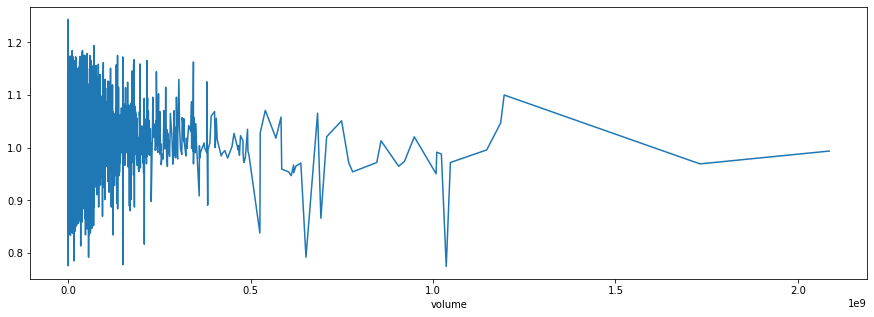

In [6]:
# 그래프 그리기를 위한 matplotlib 임포트 
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))

# 그래프를 그리기 위하여 데이터 획득 
global_yearly_life_expectancy = df.groupby('volume')['close'].mean() 
print(global_yearly_life_expectancy) 

# plot 메서드로 그래프 그리기 
global_yearly_life_expectancy.plot()

In [7]:
# 그래프 그리기를 위한 matplotlib 임포트 
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))

# 그래프를 그리기 위하여 데이터 획득 
# global_yearly_life_expectancy = df.groupby('time')['quote_av'].mean() 
global_yearly_life_expectancy = df.groupby('coin_index', 'quote_av')['close'].mean() 
print(global_yearly_life_expectancy) 

# plot 메서드로 그래프 그리기 
global_yearly_life_expectancy.plot()

ValueError: No axis named quote_av for object type DataFrame

<Figure size 1080x360 with 0 Axes>

In [ ]:
# 그래프 그리기를 위한 matplotlib 임포트 
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))

# 그래프를 그리기 위하여 데이터 획득 
# global_yearly_life_expectancy = df.groupby('time')['quote_av'].mean() 
# global_yearly_life_expectancy = df.groupby('time')['tb_quote_av'].mean() 
# global_yearly_life_expectancy.plot()
global_yearly_life_expectancy = df.groupby('time')['tb_base_av'].mean()
global_yearly_life_expectancy.plot()

<AxesSubplot:xlabel='time'>

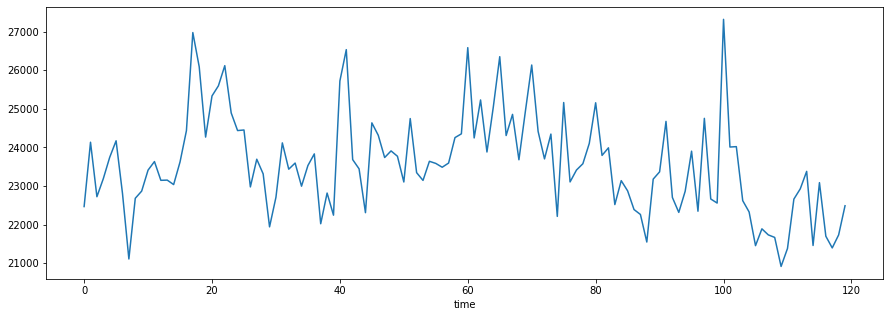

In [12]:
# 그래프 그리기를 위한 matplotlib 임포트 
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))

# 그래프를 그리기 위하여 데이터 획득 
# global_yearly_life_expectancy = df.groupby('time')['quote_av'].mean() 
global_yearly_life_expectancy = df.groupby('time')['tb_quote_av'].mean() 
# global_yearly_life_expectancy.plot()
# global_yearly_life_expectancy = df.groupby('time')['tb_base_av'].mean()
global_yearly_life_expectancy.plot()

time
0      0.999974
1      0.999968
2      0.999941
3      0.999936
4      0.999946
         ...   
115    1.000153
116    1.000145
117    1.000183
118    1.000197
119    1.000232
Name: close, Length: 120, dtype: float64


<AxesSubplot:xlabel='time'>

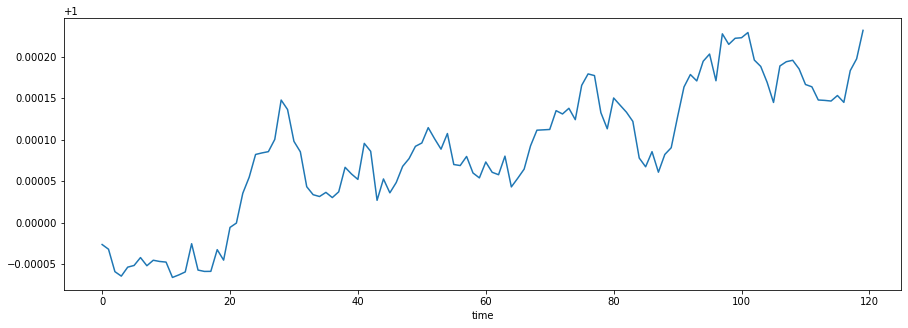

In [16]:
# 그래프 그리기를 위한 matplotlib 임포트 
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))

# 그래프를 그리기 위하여 데이터 획득 
global_yearly_life_expectancy = df.groupby('time')['close'].mean() 
print(global_yearly_life_expectancy) 

# plot 메서드로 그래프 그리기 
global_yearly_life_expectancy.plot()

<AxesSubplot:xlabel='time'>

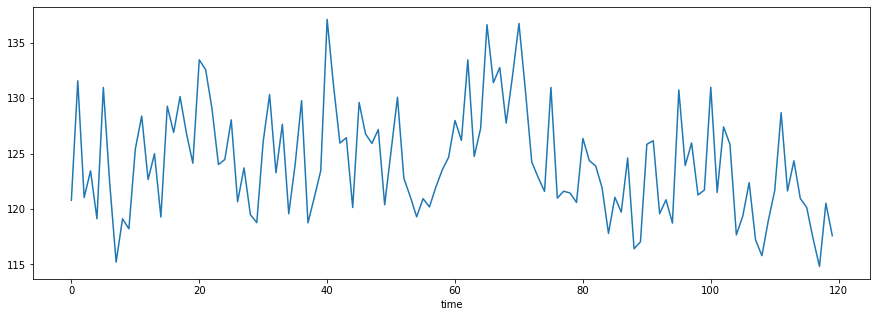

<AxesSubplot:xlabel='time'>

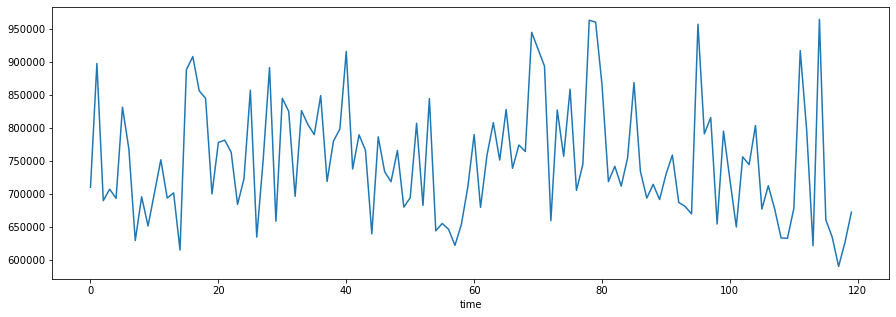

In [22]:
# 그래프 그리기를 위한 matplotlib 임포트 
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))

# 그래프를 그리기 위하여 데이터 획득 
global_yearly_life_expectancy = df.groupby('time')['volume'].mean() 
print(global_yearly_life_expectancy) 

# plot 메서드로 그래프 그리기 
global_yearly_life_expectancy.plot()

<AxesSubplot:xlabel='time'>

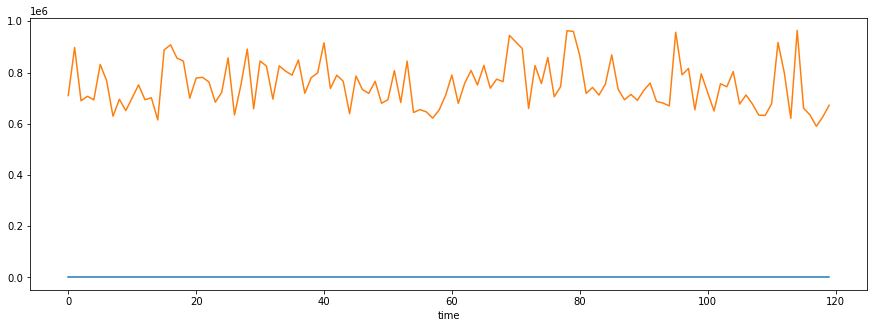

In [23]:
# 그래프 그리기를 위한 matplotlib 임포트 
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))

# 그래프를 그리기 위하여 데이터 획득 
global_yearly_life_expectancy = df.groupby('time')['close'].mean() 

# plot 메서드로 그래프 그리기 
global_yearly_life_expectancy.plot()

# 그래프를 그리기 위하여 데이터 획득 
global_yearly_life_expectancy = df.groupby('time')['volume'].mean() 

# plot 메서드로 그래프 그리기 
global_yearly_life_expectancy.plot()

time
0      46402.520605
1      48731.344777
2      46712.131599
3      46507.683125
4      47999.566546
           ...     
115    45805.331532
116    44206.307780
117    43480.417539
118    44477.685323
119    45315.549470
Name: quote_av, Length: 120, dtype: float64


<AxesSubplot:xlabel='time'>

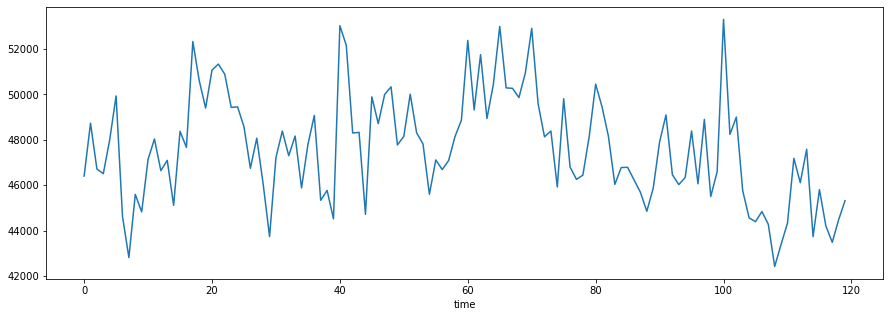

In [18]:
# 그래프 그리기를 위한 matplotlib 임포트 
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))

# 그래프를 그리기 위하여 데이터 획득 
global_yearly_life_expectancy = df.groupby('time')['quote_av'].mean() 
print(global_yearly_life_expectancy) 

# plot 메서드로 그래프 그리기 
global_yearly_life_expectancy.plot()

time
0      120.791164
1      131.572656
2      121.038573
3      123.444625
4      119.121955
          ...    
115    120.146040
116    117.327981
117    114.817853
118    120.523089
119    117.598303
Name: trades, Length: 120, dtype: float64


<AxesSubplot:xlabel='time'>

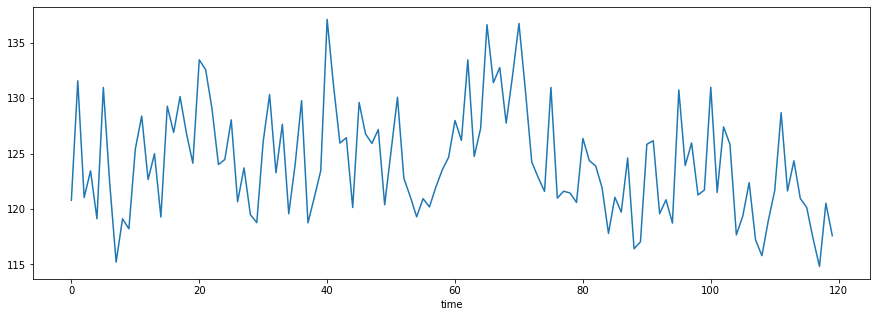

In [19]:
# 그래프 그리기를 위한 matplotlib 임포트 
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))

# 그래프를 그리기 위하여 데이터 획득 
global_yearly_life_expectancy = df.groupby('time')['trades'].mean() 
print(global_yearly_life_expectancy) 

# plot 메서드로 그래프 그리기 
global_yearly_life_expectancy.plot()